# Analysing IPL Dataset

Data Science / Analytics is all about finding valuable insights from the given dataset. In short, Finding answers that could help business. 
Dataset posted on Kaggle Datasets sourced from cricsheet. IPL is one of the most popular cricket tournaments in the world, thus the problems we try to solve and the questions that we try to answer should be familiar to anyone who knows Cricket.

# Questions:
1)How many matches we’ve got in the dataset

2)How many seasons we’ve got in the dataset?

3)Which Team had won by maximum runs?

4)Which Team had won by maximum wicket?

5)Which Team had won by closest Margin (minimum runs)?

6)Which Team had won by minimum wicket?

7)Which Season had most number of matches?

8)Which IPL Team is more successful?

9)Has Toss-winning helped in winning matches?

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset

In [17]:
matches = pd.read_csv('matches.csv')
matches.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong      NaN  
1  A Nand Kishore         S Ravi      NaN  
2     Nitin Menon      CK Nandan      NaN  
3    AK Chaudhary  C Shamshuddin      NaN  
4             NaN            NaN      NaN

# Displaying basic information about the dataset

In [18]:
matches.shape

(636, 18)

In [19]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [20]:
matches.describe()

id       season  dl_applied  win_by_runs  win_by_wickets  \
count  636.000000   636.000000  636.000000   636.000000      636.000000   
mean   318.500000  2012.490566    0.025157    13.682390        3.372642   
std    183.741666     2.773026    0.156726    23.908877        3.420338   
min      1.000000  2008.000000    0.000000     0.000000        0.000000   
25%    159.750000  2010.000000    0.000000     0.000000        0.000000   
50%    318.500000  2012.000000    0.000000     0.000000        4.000000   
75%    477.250000  2015.000000    0.000000    20.000000        7.000000   
max    636.000000  2017.000000    1.000000   146.000000       10.000000   

       umpire3  
count      0.0  
mean       NaN  
std        NaN  
min        NaN  
25%        NaN  
50%        NaN  
75%        NaN  
max        NaN

# Ques : How many matches we have got in the dataset ?

In [21]:
matches['id'].max()

636

# Ques : How many seasons we have got in the dataset ?

In [22]:
len(matches['season'].unique())

10

# Ques : Which team had won by maximum runs ?

In [27]:
matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

# Ques : Which team had won by maximum wickets ?

In [28]:
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

# Ques : Which team had won by (closest margin) minimum runs ?

In [30]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

# Ques : Which team had won by minimum wickets ?

In [32]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

# Ques : Which season had most number of matches ?

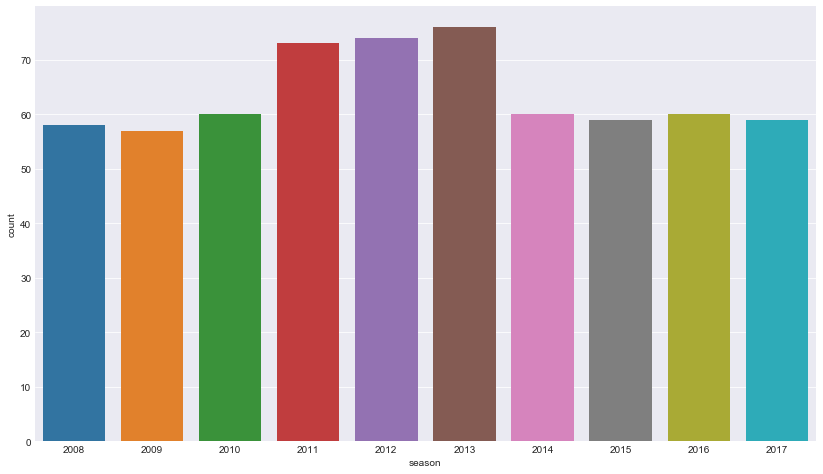

In [33]:
sns.countplot(x='season',data=matches)
plt.show()

# Ques : Which is the most successful IPL team ?

In [41]:
data = matches.winner.value_counts()
sns.barplot(y=data.index,x=data)
#sns.countplot(x='winner',data=matches)

# Ques : Top player of the match award winners

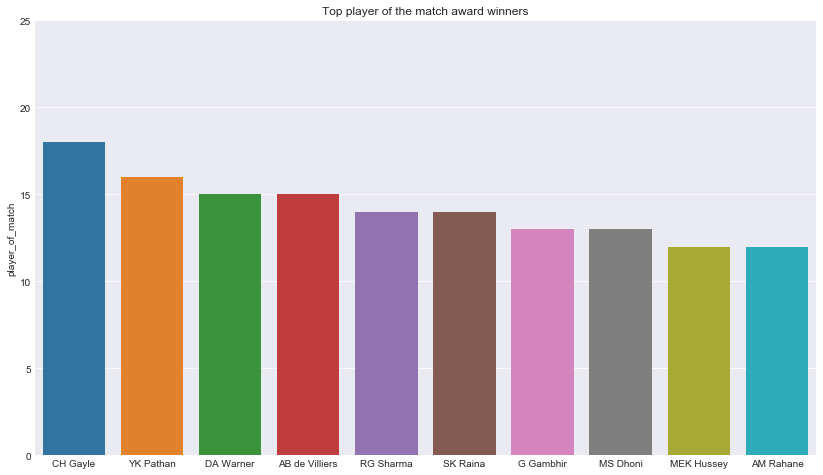

In [44]:
top_player = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,25])
ax.set_ylabel('Count')
ax.set_title("Top player of the match award winners")
sns.barplot(x= top_player.index,y=top_player,orient='v')
plt.show()

# Ques : Has toss winning helped in match winning ?

In [45]:
ss = matches['toss_winner'] == matches['winner']
ss.groupby(ss).size()

False    311
True     325
dtype: int64

In [46]:
sns.countplot(ss)